1.Setup

In [1036]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV

2. Upload and read data (train.csv)

In [1037]:
route_train = './archive/aug_train.csv'
separator = ','
df_train = pd.read_csv(route_train, sep=separator)
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


3. Data analysis, missing values and Exploratory Data analysis

In [1038]:
#Dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [1039]:
#EDA
#from pandas_profiling import ProfileReport

#prof = ProfileReport(df_train,'minimal=True')

#name = input('Name of the EDAs file: ')+'.html'

#prof.to_file(output_file=name)

In [1040]:
print('Rows and Columns in train dataset:', df_train.shape,'\n')
print('Number of nulls in train dataset:',df_train.isnull().sum())

Rows and Columns in train dataset: (19158, 14) 

Number of nulls in train dataset: enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


4. Data visualization and analysis

4.1 Data visualization

In [1041]:
#set color for Data visualization
sns.color_palette("pastel", 5)


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0)]

In [1042]:
sns.set_palette('pastel')

In [1043]:
#number of columns
df_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

enrollee_id

In [1044]:
print('Number of Unique values for enrollee_id: ',df_train.enrollee_id.nunique())

Number of Unique values for enrollee_id:  19158


city

In [1045]:
print('Number of Unique values for city: ',df_train.city.nunique(),'\n')
print('Number of nulls values for city: ',df_train.city.isnull().sum())

Number of Unique values for city:  123 

Number of nulls values for city:  0


city_development_index

In [1046]:
print('Number of Unique values for city_development_index: ',df_train.city_development_index.nunique(),'\n')
print('Number of nulls values for city_development_index: ',df_train.city_development_index.isnull().sum())

Number of Unique values for city_development_index:  93 

Number of nulls values for city_development_index:  0


gender

In [1047]:
print('Number of Unique values for gender: ',df_train.gender.nunique(),'\n')
print('Values for gender: ',df_train.gender.unique(),'\n')
print('Number of nulls values for gender: ',df_train.gender.isnull().sum())

Number of Unique values for gender:  3 

Values for gender:  ['Male' nan 'Female' 'Other'] 

Number of nulls values for gender:  4508


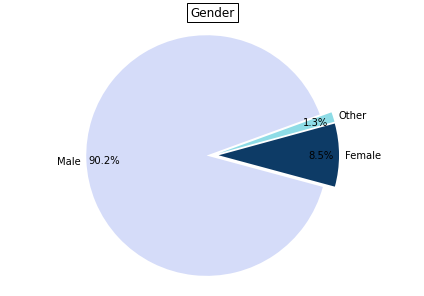

In [1048]:
#pie chart with matplotlib for gender relation
labels = df_train.gender.value_counts().keys()
sizes = df_train.gender.value_counts()

#colors

colors = ['#D5DCF9','#0D3B66','#8edce6']

explode = [0.05,0.05,0.05]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=20, pctdistance=0.85, explode=explode,
        labeldistance=1.05)

ax1.axis('equal')
plt.tight_layout()

plt.title("Gender", bbox={'facecolor':'1', 'pad':3})
plt.show()

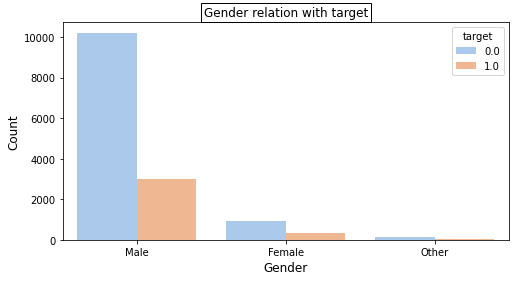

In [1049]:
#Gender relation with target
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.gender, hue=df_train.target)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.title("Gender relation with target", bbox={'facecolor':'1', 'pad':3})
plt.show()

relevent_experience

In [1050]:
print('Number of Unique values for relevent_experience: ',df_train.relevent_experience.nunique(),'\n')
print('Values for relevent_experience: ',df_train.relevent_experience.unique(),'\n')
print('Number of nulls values for relevent_experience: ',df_train.relevent_experience.isnull().sum())

Number of Unique values for relevent_experience:  2 

Values for relevent_experience:  ['Has relevent experience' 'No relevent experience'] 

Number of nulls values for relevent_experience:  0


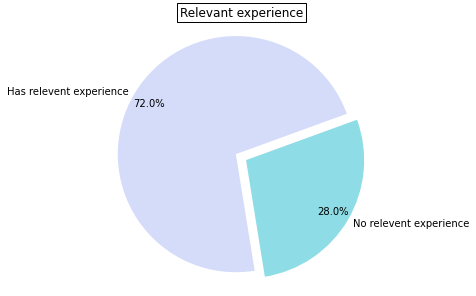

In [1051]:
#pie chart with matplotlib for relevent experience
labels = df_train.relevent_experience.value_counts().keys()
sizes = df_train.relevent_experience.value_counts()

#colors

colors = ['#D5DCF9','#8edce6']

explode = [0.05,0.05]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=20, pctdistance=0.85, explode=explode,
        labeldistance=1.05)

ax1.axis('equal')
plt.tight_layout()

plt.title("Relevant experience", bbox={'facecolor':'1', 'pad':3})
plt.show()

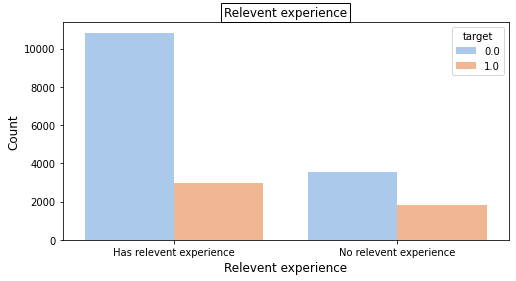

In [1052]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.relevent_experience, hue=df_train.target)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Relevent experience', fontsize=12)
plt.title("Relevent experience", bbox={'facecolor':'1', 'pad':3})
plt.show()

education_level

In [1053]:
print('Number of Unique values for education_level: ',df_train.education_level.nunique(),'\n')
print('Values for education_level: ',df_train.education_level.unique(),'\n')
print('Number of nulls values for education_level: ',df_train.education_level.isnull().sum())

Number of Unique values for education_level:  5 

Values for education_level:  ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School'] 

Number of nulls values for education_level:  460


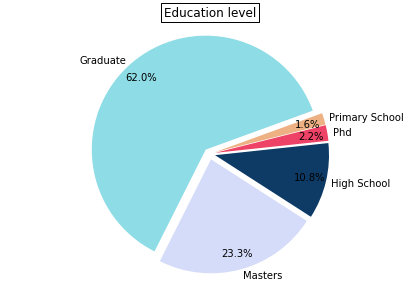

In [1054]:
#pie chart with matplotlib for education_level
labels = df_train.education_level.value_counts().keys()
sizes = df_train.education_level.value_counts()

#colors

colors = ['#8edce6','#D5DCF9','#0D3B66','#EE4266','#EDB183']

explode = [0.05,0.05,0.05,0.05,0.05]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=20, pctdistance=0.85, explode=explode,
        labeldistance=1.05)

ax1.axis('equal')
plt.tight_layout()

plt.title("Education level", bbox={'facecolor':'1', 'pad':3})
plt.show()

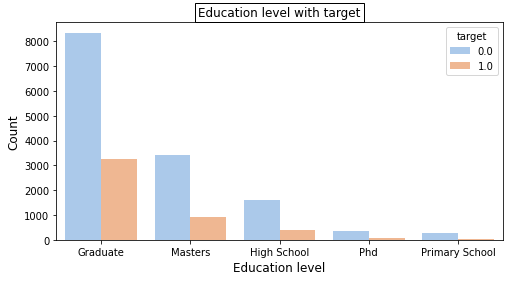

In [1055]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.education_level, hue=df_train.target)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Education level', fontsize=12)
plt.title("Education level with target", bbox={'facecolor':'1', 'pad':3})
plt.show()

major_discipline

In [1056]:
print('Number of Unique values for major_discipline: ',df_train.major_discipline.nunique(),'\n')
print('Values for major_discipline: ',df_train.major_discipline.unique(),'\n')
print('Number of nulls values for major_discipline: ',df_train.major_discipline.isnull().sum())

Number of Unique values for major_discipline:  6 

Values for major_discipline:  ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other'] 

Number of nulls values for major_discipline:  2813


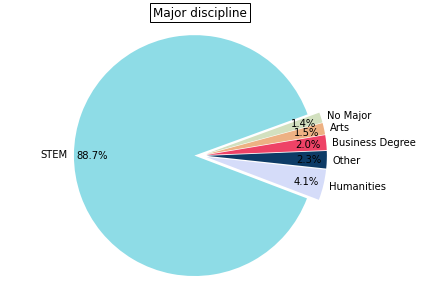

In [1057]:
#pie chart with matplotlib for major_discipline
labels = df_train.major_discipline.value_counts().keys()
sizes = df_train.major_discipline.value_counts()

#colors

colors = ['#8edce6','#D5DCF9','#0D3B66','#EE4266','#EDB183','#D2E0BF']

explode = [0.05,0.05,0.05,0.05,0.05,0.05]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=20, pctdistance=0.85, explode=explode,
        labeldistance=1.05)

ax1.axis('equal')
plt.tight_layout()

plt.title("Major discipline", bbox={'facecolor':'1', 'pad':3})
plt.show()

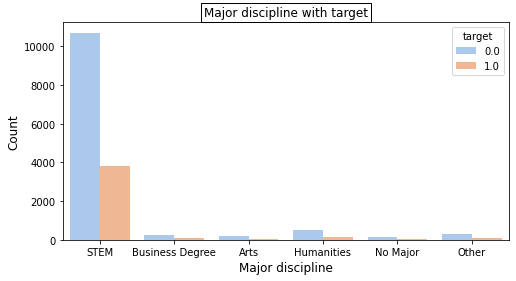

In [1058]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.major_discipline, hue=df_train.target)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Major discipline', fontsize=12)
plt.title("Major discipline with target", bbox={'facecolor':'1', 'pad':3})
plt.show()

experience

In [1059]:
print('Number of Unique values for experience: ',df_train.experience.nunique(),'\n')
print('Values for experience: ',df_train.experience.unique(),'\n')
print('Number of nulls values for experience: ',df_train.experience.isnull().sum())

Number of Unique values for experience:  22 

Values for experience:  ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan] 

Number of nulls values for experience:  65


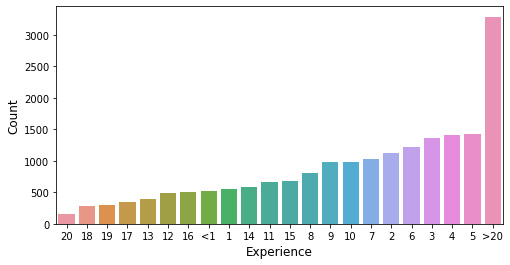

In [1060]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.experience,order=df_train.experience.value_counts().sort_values().index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Experience', fontsize=12)
plt.show()

company_size

In [1061]:
print('Number of Unique values for company size: ',df_train.company_size.nunique(),'\n')
print('Values for company size: ',df_train.company_size.unique(),'\n')
print('Number of nulls values for company size: ',df_train.company_size.isnull().sum())

Number of Unique values for company size:  8 

Values for company size:  [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999'] 

Number of nulls values for company size:  5938


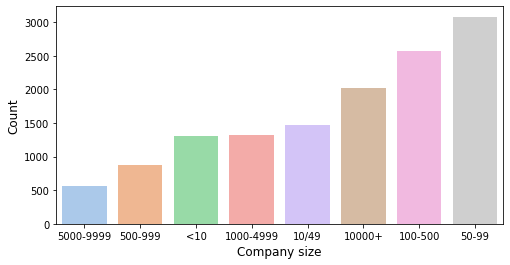

In [1062]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.company_size,order=df_train.company_size.value_counts().sort_values().index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company size', fontsize=12)
plt.show()

company_type

In [1063]:
print('Number of Unique values for company: ',df_train.company_type.nunique(),'\n')
print('Values for company type: ',df_train.company_type.unique(),'\n')
print('Number of nulls values for company type: ',df_train.company_type.isnull().sum())

Number of Unique values for company:  6 

Values for company type:  [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO'] 

Number of nulls values for company type:  6140


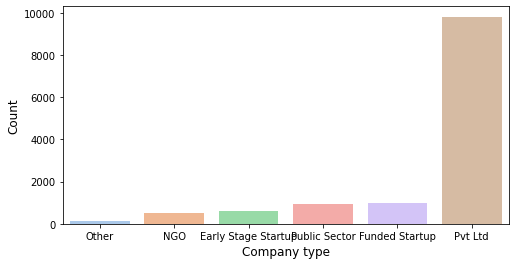

In [1064]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.company_type,order=df_train.company_type.value_counts().sort_values().index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company type', fontsize=12)
plt.show()

last_new_job

In [1065]:
print('Number of Unique values for last new job: ',df_train.last_new_job.nunique(),'\n')
print('Values for last new job: ',df_train.last_new_job.unique(),'\n')
print('Number of nulls values for last new job: ',df_train.last_new_job.isnull().sum())

Number of Unique values for last new job:  6 

Values for last new job:  ['1' '>4' 'never' '4' '3' '2' nan] 

Number of nulls values for last new job:  423


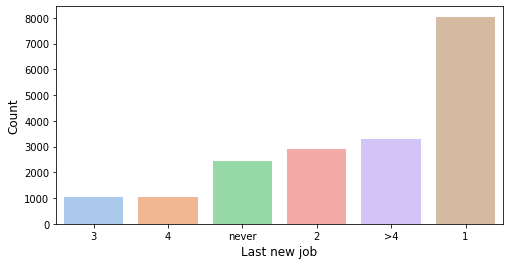

In [1066]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.last_new_job,order=df_train.last_new_job.value_counts().sort_values().index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Last new job', fontsize=12)
plt.show()

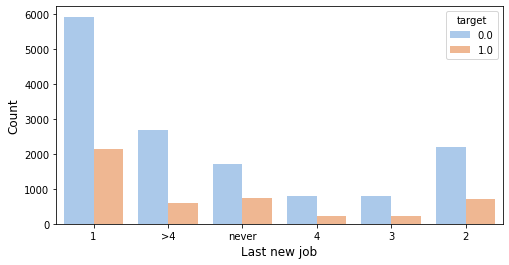

In [1067]:
#last new job relation wit target
plt.figure(figsize=(8,4))
sns.countplot(x=df_train.last_new_job,hue=df_train.target)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Last new job', fontsize=12)
plt.show()

training_hours

In [1068]:
print('Number of Unique values for training hours: ',df_train.training_hours.nunique(),'\n')
#print('Values for training hours: ',df_train.training_hours.unique(),'\n')
print('Number of nulls values for training hours: ',df_train.training_hours.isnull().sum())

Number of Unique values for training hours:  241 

Number of nulls values for training hours:  0


<Figure size 720x360 with 0 Axes>

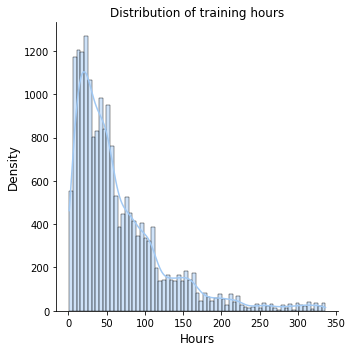

In [1069]:
plt.figure(figsize=(10, 5))
sns.displot(df_train.training_hours,kde=True)
plt.title('Distribution of training hours')
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

target

0 = not looking for job change 1 = looking for job change

In [1070]:
print('Number of Unique values for target: ',df_train.target.nunique(),'\n')
print('Values for training hours: ',df_train.target.unique(),'\n')
print('Number of nulls values for target: ',df_train.target.isnull().sum())

Number of Unique values for target:  2 

Values for training hours:  [1. 0.] 

Number of nulls values for target:  0


/home/manuel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


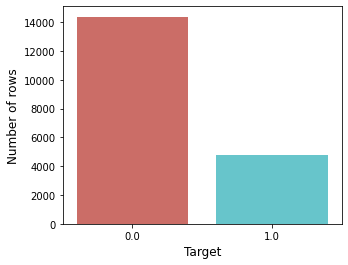

In [1071]:
plt.figure(figsize=(5, 4))
sns.barplot(df_train.target.value_counts().index,
    df_train.target.value_counts(),palette='hls')                                                                                                                       
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.show()

4.2. Data processing

In [1072]:
#create a copy of dataset for data cleaning
train_copy = df_train

In [1073]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [1074]:
train_copy.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [1075]:
#delete values with high cardinality or no relevant for the study
train_copy = train_copy.drop(['city','enrollee_id','city_development_index'],axis=1)


In [1076]:
print('Number of nulls in train dataset: ',train_copy.isnull().sum())

Number of nulls in train dataset:  gender                 4508
relevent_experience       0
enrolled_university     386
education_level         460
major_discipline       2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
training_hours            0
target                    0
dtype: int64


In [1077]:
numeric= [x for x in train_copy.dtypes.index if (train_copy.dtypes[x]=='float64' or train_copy.dtypes[x]=='int64')]
categoric= [x for x in train_copy.dtypes.index if train_copy.dtypes[x]=='object']

print("Numeric:",numeric)
print("Categoric:",categoric)

Numeric: ['training_hours', 'target']
Categoric: ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [1078]:
def fill_nulls_with_most_frequent_category(DataFrame,ColumnName):
    #obtain category type object analyzing whole dataset
    most_frequent_category=DataFrame[ColumnName].mode()[0]
    print(most_frequent_category)
    #fill column with the most frequent value
    DataFrame[ColumnName].fillna(most_frequent_category,inplace=True)    

In [1079]:
#replace nan values for the most frequent of each category
for i in train_copy.select_dtypes(include = "object").columns:
    fill_nulls_with_most_frequent_category(train_copy, i)

Male
Has relevent experience
no_enrollment
Graduate
STEM
>20
50-99
Pvt Ltd
1


In [1080]:
train_copy.isnull().sum()

gender                 0
relevent_experience    0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
company_type           0
last_new_job           0
training_hours         0
target                 0
dtype: int64

In [1081]:
#change categoric columns to numeric

In [1082]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               19158 non-null  object 
 1   relevent_experience  19158 non-null  object 
 2   enrolled_university  19158 non-null  object 
 3   education_level      19158 non-null  object 
 4   major_discipline     19158 non-null  object 
 5   experience           19158 non-null  object 
 6   company_size         19158 non-null  object 
 7   company_type         19158 non-null  object 
 8   last_new_job         19158 non-null  object 
 9   training_hours       19158 non-null  int64  
 10  target               19158 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.6+ MB


In [1083]:
#replace categorical for numeric
#train_copy['gender'] = train_copy['gender'].replace(to_replace=['Male', 'Female','Other'], value=[0,1,3])
train_copy['relevent_experience'] = train_copy['relevent_experience'].replace(to_replace=['No relevent experience', 'Has relevent experience'], value=[0,1])
train_copy['last_new_job'] = train_copy['last_new_job'].replace(to_replace=['never','>4'], value=[0,5])

In [1084]:
train_copy['experience'] = train_copy['experience'].replace(to_replace=['>20','<1'], value=[21,0])
train_copy['last_new_job'] = train_copy['last_new_job'].replace(to_replace=['>4','never'], value=[5,0])

In [1085]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               19158 non-null  object 
 1   relevent_experience  19158 non-null  int64  
 2   enrolled_university  19158 non-null  object 
 3   education_level      19158 non-null  object 
 4   major_discipline     19158 non-null  object 
 5   experience           19158 non-null  object 
 6   company_size         19158 non-null  object 
 7   company_type         19158 non-null  object 
 8   last_new_job         19158 non-null  object 
 9   training_hours       19158 non-null  int64  
 10  target               19158 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 1.6+ MB


In [1086]:
obj_list =train_copy.select_dtypes(include = 'object').columns
print('Categoric values: ', obj_list)

Categoric values:  Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')


In [1092]:
for i in obj_list:
   train_copy= pd.get_dummies(data=train_copy,columns=[i])

In [1093]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   relevent_experience                   19158 non-null  int64  
 1   training_hours                        19158 non-null  int64  
 2   target                                19158 non-null  float64
 3   gender_Female                         19158 non-null  uint8  
 4   gender_Male                           19158 non-null  uint8  
 5   gender_Other                          19158 non-null  uint8  
 6   enrolled_university_Full time course  19158 non-null  uint8  
 7   enrolled_university_Part time course  19158 non-null  uint8  
 8   enrolled_university_no_enrollment     19158 non-null  uint8  
 9   education_level_Graduate              19158 non-null  uint8  
 10  education_level_High School           19158 non-null  uint8  
 11  education_level

<AxesSubplot:>

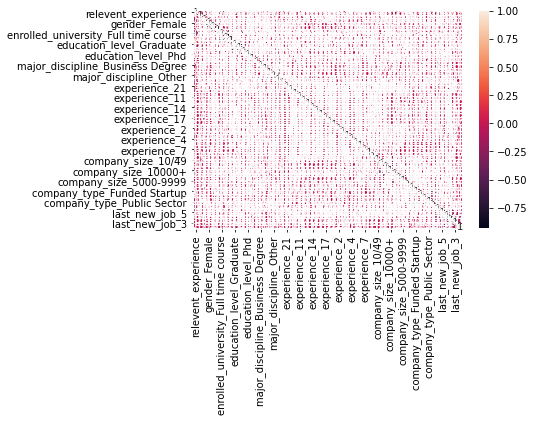

In [1094]:
#heat map
correlation_matrix = train_copy.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [1095]:
y = train_copy['target']
X = train_copy.drop(['target'],axis=1)

In [1097]:
colums_X = X.columns.to_list()
ss = StandardScaler()
ss.fit_transform(X)
X = pd.DataFrame(data = ss.fit_transform(X), columns=colums_X)
X

,relevent_experience,training_hours,gender_Female,gender_Male,gender_Other,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_5,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4
0,0.623752,-0.488985,-0.26284,0.283906,-0.10035,-0.493908,-0.258271,0.590652,0.767347,-0.343032,...,-0.167198,-0.079725,-0.22905,0.447886,-0.383110,-0.455341,1.124160,-0.422343,-0.237631,-0.238243
1,-1.603202,-0.305825,-0.26284,0.283906,-0.10035,-0.493908,-0.258271,0.590652,0.767347,-0.343032,...,-0.167198,-0.079725,-0.22905,0.447886,-0.383110,2.196156,-0.889553,-0.422343,-0.237631,-0.238243
2,-1.603202,0.293607,-0.26284,0.283906,-0.10035,2.024668,-0.258271,-1.693044,0.767347,-0.343032,...,-0.167198,-0.079725,-0.22905,0.447886,2.610213,-0.455341,-0.889553,-0.422343,-0.237631,-0.238243
3,-1.603202,-0.222571,-0.26284,0.283906,-0.10035,-0.493908,-0.258271,0.590652,0.767347,-0.343032,...,-0.167198,-0.079725,-0.22905,0.447886,2.610213,-0.455341,-0.889553,-0.422343,-0.237631,-0.238243
4,0.623752,-0.955209,-0.26284,0.283906,-0.10035,-0.493908,-0.258271,0.590652,-1.303192,-0.343032,...,-0.167198,-0.079725,-0.22905,-2.232712,-0.383110,-0.455341,-0.889553,-0.422343,-0.237631,4.197389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,-1.603202,-0.389079,-0.26284,0.283906,-0.10035,-0.493908,-0.258271,0.590652,0.767347,-0.343032,...,-0.167198,-0.079725,-0.22905,0.447886,-0.383110,-0.455341,1.124160,-0.422343,-0.237631,-0.238243
19154,0.623752,-0.222571,-0.26284,0.283906,-0.10035,-0.493908,-0.258271,0.590652,0.767347,-0.343032,...,-0.167198,-0.079725,-0.22905,0.447886,-0.383110,-0.455341,-0.889553,-0.422343,-0.237631,4.197389
19155,0.623752,-0.355778,-0.26284,0.283906,-0.10035,-0.493908,-0.258271,0.590652,0.767347,-0.343032,...,-0.167198,-0.079725,-0.22905,0.447886,-0.383110,-0.455341,-0.889553,-0.422343,-0.237631,4.197389
19156,0.623752,0.526719,-0.26284,0.283906,-0.10035,-0.493908,-0.258271,0.590652,-1.303192,2.915178,...,-0.167198,-0.079725,-0.22905,0.447886,-0.383110,-0.455341,-0.889553,2.367743,-0.237631,-0.238243


5. Feature Importance

In [1098]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
columns = X.columns.to_list()
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f of 100)" % (f + 1, columnas[indices[f]], importances[indices[f]]*100))

Feature ranking:
1. feature training_hours (51.482434 of 100)
2. feature company_size_50-99 (2.427805 of 100)
3. feature relevent_experience (2.419269 of 100)
4. feature last_new_job_1 (1.836015 of 100)
5. feature last_new_job_2 (1.558784 of 100)
6. feature education_level_Graduate (1.349166 of 100)
7. feature enrolled_university_Full time course (1.330061 of 100)
8. feature enrolled_university_no_enrollment (1.251021 of 100)
9. feature company_type_Pvt Ltd (1.230523 of 100)
10. feature major_discipline_STEM (1.150071 of 100)
11. feature last_new_job_0 (1.055055 of 100)
12. feature last_new_job_5 (1.008722 of 100)
13. feature gender_Male (0.988607 of 100)
14. feature experience_5 (0.980484 of 100)
15. feature experience_3 (0.965871 of 100)
16. feature last_new_job_3 (0.959283 of 100)
17. feature experience_6 (0.936933 of 100)
18. feature experience_0 (0.932410 of 100)
19. feature gender_Female (0.928285 of 100)
20. feature experience_21 (0.926318 of 100)
21. feature last_new_job_4 (0.9

In [1115]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest, f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                   Specs       Score
45                    company_size_50-99  573.957035
5   enrolled_university_Full time course  441.961675
7      enrolled_university_no_enrollment  366.801294
0                    relevent_experience  321.265400
20                         experience_21  186.962641
8               education_level_Graduate  141.156437
42                  company_size_100-500  123.445743
19                          experience_0  120.848534
56                        last_new_job_5   95.663354
21                          experience_1   92.979945


Train model

ADA Boost

In [1099]:
model_Ada = AdaBoostClassifier(n_estimators=200, random_state=44)
model_Ada.fit(X, y)

pred_Ada_train = model_Ada.predict_proba(X)

print('LogReg Accuracy: {}'.format(model_Ada.score(X, y)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y, pred_Ada_train[:, 1])))

LogReg Accuracy: 0.7582211086752271
LogReg roc-auc: 0.6969572725928107


Random Forest

In [1100]:
model_Forest = RandomForestClassifier(n_estimators=200, random_state=39)
model_Forest.fit(X, y)

pred_Forest_train = model_Forest.predict_proba(X)

print('LogReg Accuracy: {}'.format(model_Forest.score(X, y)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y, pred_Forest_train[:, 1])))

LogReg Accuracy: 0.982618227372377
LogReg roc-auc: 0.9987070591260125


KNeighbors

In [1101]:
model_KN = KNeighborsClassifier(n_neighbors=5)
model_KN.fit(X, y)

pred_KN_train = model_KN.predict_proba(X)

print('LogReg Accuracy: {}'.format(model_KN.score(X, y)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y, pred_KN_train[:, 1])))

LogReg Accuracy: 0.7924104812610919
LogReg roc-auc: 0.8213909954952571


Load and clean test dataset

In [1102]:
route_test = './archive/aug_test.csv'
separator = ','
df_test = pd.read_csv(route_test, sep=separator)
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [1103]:
test_copy = df_test

In [1104]:
#delete values with high cardinality or no relevant for the study
test_copy = test_copy.drop(['city','enrollee_id','city_development_index'],axis=1)

In [1105]:
#replace nan values for the most frequent of each category
for i in test_copy.select_dtypes(include = "object").columns:
    fill_nulls_with_most_frequent_category(test_copy, i)

Male
Has relevent experience
no_enrollment
Graduate
STEM
>20
50-99
Pvt Ltd
1


In [1106]:
test_copy['relevent_experience'] = test_copy['relevent_experience'].replace(to_replace=['No relevent experience', 'Has relevent experience'], value=[0,1])
test_copy['last_new_job'] = test_copy['last_new_job'].replace(to_replace=['never','>4'], value=[0,5])
test_copy['experience'] = test_copy['experience'].replace(to_replace=['>20','<1'], value=[21,0])
test_copy['last_new_job'] = test_copy['last_new_job'].replace(to_replace=['>4','never'], value=[5,0])

In [1107]:
obj_list =test_copy.select_dtypes(include = 'object').columns
print('Categoric values: ', obj_list)

Categoric values:  Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')


In [1108]:
for i in obj_list:
   test_copy= pd.get_dummies(data=test_copy,columns=[i])

In [1111]:
test_copy.sample(5)

,relevent_experience,training_hours,gender_Female,gender_Male,gender_Other,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_5,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4
2096,1,8,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1613,1,89,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
645,0,4,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1246,1,55,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
1575,0,50,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [1113]:
X_test = test_copy

colums_X_test = X_test.columns.to_list()

ss = StandardScaler()
ss.fit_transform(X_test)
X_test = pd.DataFrame(data = ss.fit_transform(X_test), columns=colums_X_test)
X_test

,relevent_experience,training_hours,gender_Female,gender_Male,gender_Other,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_0,last_new_job_5,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4
0,0.630065,-0.730319,-0.262250,0.286023,-0.106777,1.973386,-0.26934,-1.636163,0.782086,-0.341194,...,-0.159781,-0.075289,-0.251866,0.446583,-0.371341,-0.445826,1.141977,-0.437473,-0.258134,-0.243319
1,0.630065,0.548230,3.813154,-3.496227,-0.106777,-0.506743,-0.26934,0.611186,0.782086,-0.341194,...,-0.159781,-0.075289,-0.251866,0.446583,-0.371341,-0.445826,1.141977,-0.437473,-0.258134,-0.243319
2,-1.587138,-0.829946,-0.262250,0.286023,-0.106777,-0.506743,-0.26934,0.611186,-1.278632,2.930886,...,-0.159781,-0.075289,-0.251866,0.446583,2.692942,-0.445826,-0.875674,-0.437473,-0.258134,-0.243319
3,0.630065,-0.431437,-0.262250,0.286023,-0.106777,-0.506743,-0.26934,0.611186,-1.278632,-0.341194,...,-0.159781,-0.075289,-0.251866,0.446583,-0.371341,-0.445826,1.141977,-0.437473,-0.258134,-0.243319
4,0.630065,0.116513,-0.262250,0.286023,-0.106777,-0.506743,-0.26934,0.611186,0.782086,-0.341194,...,-0.159781,-0.075289,-0.251866,0.446583,-0.371341,2.243025,-0.875674,-0.437473,-0.258134,-0.243319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,-1.587138,-0.829946,-0.262250,0.286023,-0.106777,-0.506743,-0.26934,0.611186,0.782086,-0.341194,...,-0.159781,-0.075289,3.970363,-2.239224,-0.371341,-0.445826,-0.875674,-0.437473,-0.258134,4.109837
2125,0.630065,-0.580878,-0.262250,0.286023,-0.106777,-0.506743,-0.26934,0.611186,-1.278632,-0.341194,...,-0.159781,-0.075289,-0.251866,0.446583,-0.371341,-0.445826,-0.875674,2.285858,-0.258134,-0.243319
2126,-1.587138,-0.780132,-0.262250,0.286023,-0.106777,-0.506743,-0.26934,0.611186,-1.278632,-0.341194,...,-0.159781,-0.075289,-0.251866,0.446583,2.692942,-0.445826,-0.875674,-0.437473,-0.258134,-0.243319
2127,0.630065,0.315767,-0.262250,0.286023,-0.106777,1.973386,-0.26934,-1.636163,-1.278632,2.930886,...,-0.159781,-0.075289,3.970363,-2.239224,-0.371341,-0.445826,1.141977,-0.437473,-0.258134,-0.243319


Prediction

In [1117]:
model = RandomForestClassifier(n_estimators=800,
                               min_samples_split=12,
                               min_samples_leaf=2, 
                               max_depth=15)

In [1118]:
model.fit(X,y)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=12,
                       n_estimators=800)

In [1126]:
prediction = model.predict(X_test)

In [1127]:
route_sample = './archive/sample_submission.csv'
separator = ','
df_sample_submission = pd.read_csv(route_test, sep=separator)
df_sample_submission

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [1130]:
df_sample_submission = prediction

In [1131]:
df_sample_submission.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'